In [1]:
# !kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

In [2]:
# !cd data

In [3]:
# !unzip ./climate-change-earth-surface-temperature-data.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data=pd.read_csv('data/GlobalTemperatures.csv')
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [3]:
data.tail(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [4]:
data.set_index('dt',inplace=True)

In [5]:
temp=data[['LandAverageTemperature']]
temp.index=pd.to_datetime(temp.index)

<AxesSubplot:xlabel='dt'>

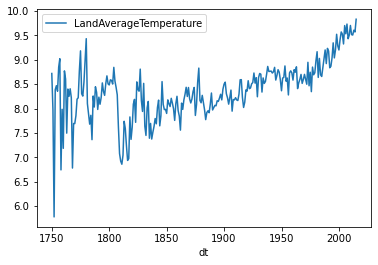

In [6]:
temp.groupby(temp.index.year).mean().plot()

In [10]:
temp=temp.fillna(0)

<AxesSubplot:title={'center':'Noise'}, xlabel='dt'>

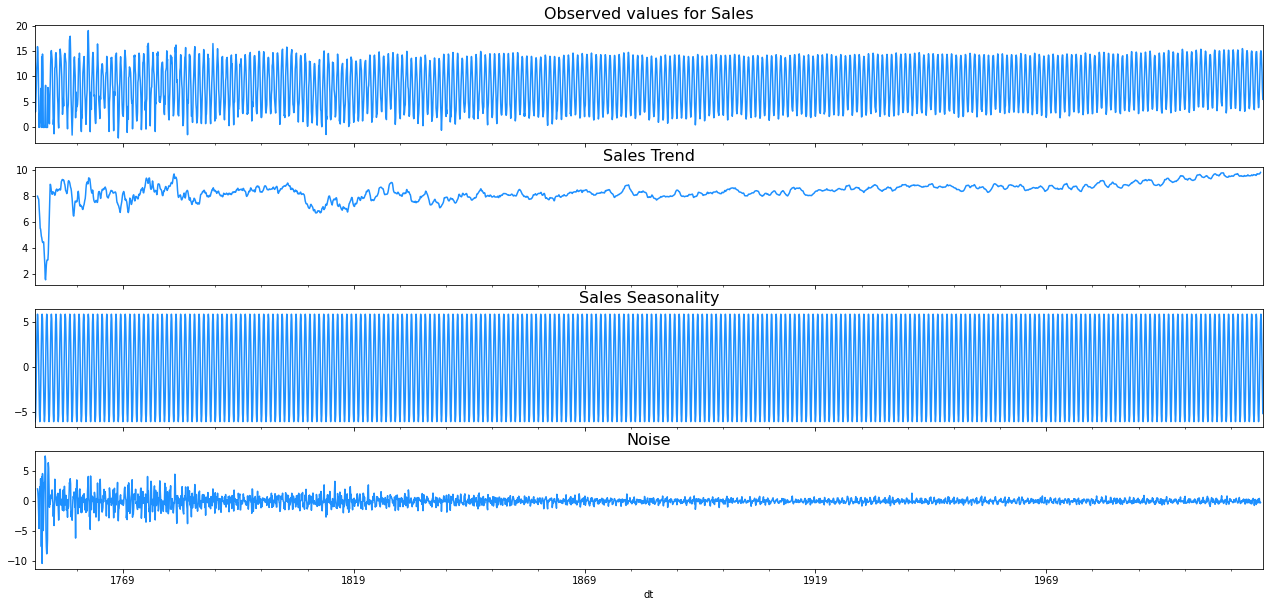

In [11]:
#decomposition
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(temp,period=12,model='additive')
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(22,10))
ax[0].set_title('Observed values for Sales', fontsize=16)
decomp.observed.plot(ax = ax[0], legend=False, color='dodgerblue')
ax[1].set_title('Sales Trend', fontsize=16)
decomp.trend.plot(ax = ax[1],legend=False, color='dodgerblue')

ax[2].set_title('Sales Seasonality', fontsize=16)
decomp.seasonal.plot(ax = ax[2],legend=False, color='dodgerblue')

ax[3].set_title('Noise', fontsize=16)
decomp.resid.plot(ax = ax[3],legend=False, color='dodgerblue')

<AxesSubplot:xlabel='dt'>

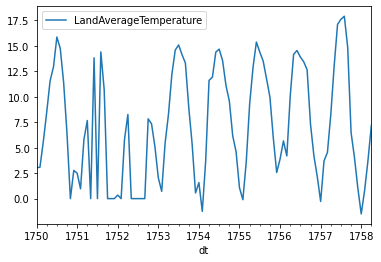

In [12]:
temp[:100].plot()

In [18]:
temp=temp.rename(columns={'LandAverageTemperature':'temp'})

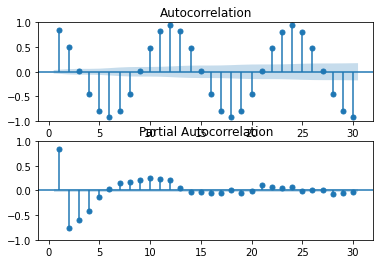

In [16]:
fig,ax=plt.subplots(nrows=2,ncols=1)

ax[0].set_title("ACF")
plot_acf(temp,lags=30,zero=False,ax=ax[0])
ax[1].set_title("PACF")
plot_pacf(temp,lags=30,zero=False,ax=ax[1],method='ywm')
plt.show()

In [19]:
temp['diff_temp']=temp['temp'].diff(12)

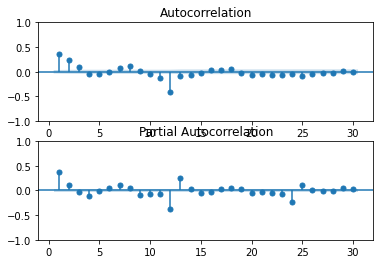

CPU times: user 360 ms, sys: 217 ms, total: 577 ms
Wall time: 316 ms


In [24]:
%%time
fig,ax=plt.subplots(nrows=2,ncols=1)

ax[0].set_title("ACF")
plot_acf(temp['diff_temp'].dropna(),lags=30,zero=False,ax=ax[0])
ax[1].set_title("PACF")
plot_pacf(temp['diff_temp'].dropna(),lags=30,zero=False,ax=ax[1],method='ywm')
plt.show()

In [53]:
#sarimax model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(temp['temp'], order=(1,1,2), seasonal_order=(0,1,1,12))
result_sarimax = model_sarimax.fit(disp=False)


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
#mean squared error
from sklearn.metrics import mean_squared_error
predictions_sarimax = result_sarimax.predict(start=0, end=len(temp['temp'])-1, dynamic=False)
mean_squared_error(temp['temp'], predictions_sarimax)

1.055891621787613

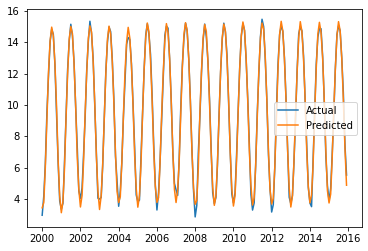

In [57]:
#plot predictions with actual values
plt.plot(temp['temp'][3000:], label='Actual')
plt.plot(predictions_sarimax[3000:], label='Predicted')
plt.legend()

In [55]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 temp   No. Observations:                 3192
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -4249.668
Date:                              Sun, 22 May 2022   AIC                           8509.336
Time:                                      10:20:26   BIC                           8539.658
Sample:                                  01-01-1750   HQIC                          8520.211
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5901      0.012     50.633      0.000       0.567       0.613
ma.L1         -1.2037      0.014    -85.781      0.000      -1.231      -1.176
ma.L2          0.2203      0.013     17.174      0.000       0.195       0.245
ma.S.L12      -0.9747      0.008   -121.829      0.000      -0.990      -0.959
sigma2         0.8376      0.008     98.854      0.000       0.821       0.854
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):             67372.40
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

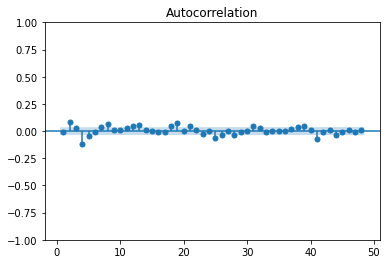

In [56]:
plot_acf(result_sarimax.resid, lags=48, zero=False);


In [62]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense
import tensorflow as tf
LOOKBACK=12
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
def create_model():
    input_layer = Input(shape=(LOOKBACK, 1))
    recurrent = Bidirectional(LSTM(20, activation="tanh"))(input_layer)
    output_layer = Dense(1)(recurrent)
    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        loss='mse', optimizer=keras.optimizers.Adagrad(),
        metrics=[
            keras.metrics.RootMeanSquaredError(),
            keras.metrics.MeanAbsoluteError()
    ])
    return model

model = create_model()

2022-05-22 10:30:57.545300: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-22 10:30:57.545358: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-22 10:30:57.545392: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-05-22 10:30:57.546950: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.fit(X_train, y_train, epochs=1000, callbacks=[callback])